# Search text

In [31]:
import io, json

vacancy_search_text = "python flask senior"

def load_json_from_file(path):
    with io.open(path, encoding='utf-8', mode='r') as  json_file:
        return json.load(json_file)

raw_vacancy_data = load_json_from_file("json/"+vacancy_search_text+".json")
print(vacancy_search_text)

python flask senior


In [32]:
import datetime
def prepare_vacancy_data(vacancy_data):
    new_vacancy_data = []
    for vacancy in vacancy_data:
        new_vacancy = {}        
        new_vacancy["key_skills"] = ', '.join(list(vacancy["key_skills"] or []))
        #new_vacancy["key_skills"] = list(vacancy["key_skills"] or [])
        #new_vacancy["key_skills"] = pd.Series(data=list(vacancy["key_skills"] or []))
        new_vacancy["name"] = vacancy["name"]
        new_vacancy["id"] = vacancy["id"]        
        new_vacancy["description"] = vacancy["description"]
        new_vacancy["salary"] = vacancy["salary"]       
        new_vacancy["creation_time"] = vacancy["creation_time"]
        if "name" in vacancy["employer"]:
            new_vacancy["employer"] = vacancy["employer"]["name"]
        if "visible_name" in vacancy["employer"]:
            new_vacancy["employer"] = vacancy["employer"]["visible_name"]        
        
        if "schedule" in vacancy:
            if type(vacancy["schedule"]) == str:            
                new_vacancy["schedule"] = vacancy["schedule"]  
            if type(vacancy["schedule"]) == dict:            
                new_vacancy["schedule"] = vacancy["schedule"]["id"]   
            
        new_vacancy["accept_temporary"] = vacancy["accept_temporary"]       
        new_vacancy_data.append(new_vacancy)
    return new_vacancy_data

vacancys_data = prepare_vacancy_data(raw_vacancy_data)

In [33]:
import pandas as pd

df = pd.DataFrame(columns= list(vacancys_data[0].keys()))
ind = 0
for data in vacancys_data:     
    if (len(df.columns)==len(data)):
        df.loc[ind] = data
        ind+=1

df.to_csv("csv/"+vacancy_search_text+".csv", encoding="utf8", index=False) 

In [34]:
import pandas as pd
df = pd.DataFrame()
df=pd.read_csv("csv/"+vacancy_search_text+".csv", encoding="utf8" )

In [35]:
import re 
import math
from currency_converter import CurrencyConverter
from datetime import date # datetime works too
c = CurrencyConverter()

def process_salary_value (salary_structure):
    salary = salary_structure
    salary_value = False

    if ("from" in salary) and ("to" in salary):
        salary_value = ((salary["from"] or 0) + (salary["to"] or 0))/2
    else:
        if "from" in salary:
            salary_value = salary["from"]
        if "to" in salary:
            salary_value = salary["to"]    
    return salary_value

for vacancy in vacancys_data:
    if type(vacancy["salary"]) == dict:
        salary = vacancy["salary"]        
        salary_value = process_salary_value (salary)
                
        if salary_value and ("currency" in salary):
            if not(re.search(r'RUR', salary["currency"])):
                try:
                    salary_value = math.floor(c.convert(salary_value, salary["currency"], 'RUB'))
                    df.at[vacancys_data.index(vacancy),"salary"] = salary_value
                    #print(salary_value,"from", salary["currency"])                       
                except Exception as err:
                    #print("Problems with currency "+salary["currency"], err)
                    pass
            else:
                df.at[vacancys_data.index(vacancy),"salary"] = salary_value

In [36]:
import pandas as pd
pd.set_option("display.max_rows",None)
display(df)

,key_skills,name,id,description,salary,creation_time,employer,schedule,accept_temporary
0,"Английский — B1 — Средний, MySQL, RabbitMQ, Ce...",Middle/Senior Python developer,48881114,We are looking for a backend **Python Develope...,NaN,2021-10-15T15:34:24.258+03:00,Руна Системс,FLEXIBLE,False
1,NaN,Python разработчик,51629618,Наша команда занимаемся развитием и сопровожде...,NaN,2022-01-24T12:47:42.353+03:00,Сбер. IT,FULL_DAY,False
2,"Английский — A1 — Начальный, Python, Linux, Do...",Senior Python Developer,52120827,"✅ **О компании:** продуктовая компания, котора...",396637,2022-02-04T17:32:28.357+03:00,Dysnix,REMOTE,False
3,"Python, Django Framework, PostgreSQL, Linux, S...",Python разработчик (senior) (backend)/ Backend...,43941903,Ищем активного человека с опытом написания раз...,500000,2021-04-16T10:29:21.553+03:00,Лендсбэй,FULL_DAY,False
4,"Английский — B1 — Средний, Linux, Python, Веб-...",Senior Python backend developer (remote),52052303,Зовем вас поучаствовать в разработке нового пр...,604400,2022-02-03T02:18:25.413+03:00,Темпеста,REMOTE,True
5,"Python, Redis, PostgreSQL, Git, Django Framework",Python - разработчик,51638445,Привет!Мы компания Wemakefab. Занимаемся разра...,140000,2022-01-24T14:33:25.258+03:00,Wemakefab,FULL_DAY,False
6,"Python, Flask, PostgreSQL",Senior Python Backend Engineer,51224633,**APPLY HERE:https://jobs.lever.co/revolut/f8...,356200,2022-01-17T20:57:04.518+03:00,Revolut,FULL_DAY,False
7,"Python, Django Framework",Middle/Senior Python Developer,51946677,"У нас очень масштабные и нескучные проекты, не...",240000,2022-01-31T11:45:00.581+03:00,БОЛЬШАЯ ТРОЙКА,REMOTE,False
8,"Python, Git, Django Framework, Linux, PostgreSQL",Middle python-разработчик,50586452,"Мы - Кодеры, компания аутсорс-разработки проду...",150000,2021-12-20T18:20:58.372+03:00,Digital Hub,REMOTE,False
9,"Python, PostgreSQL, MongoDB, REST, HTTP, Git, ...",Стажер-разработчик Python,50955297,Наша компания занимается разработкой решений...,35000,2022-01-11T20:36:02.899+03:00,Аналитические программные решения,FULL_DAY,False


In [37]:
def make_simple_word_pie(data_frame,collumn,title):
    plt.title(title or collumn)
    word_series = df[collumn]
    word_series = pd.Series(data=list(Counter(word_series.values)), 
                                index=list(Counter(word_series.values).values()))
    wedges, patches, texts = plt.pie(word_series.index, 
                                     labels = word_series.values, 
                                     autopct='%1.1f%%')
    plt.legend(labels = word_series.values)    

Средняя зарплата:  257217
Медианная зарплата:  280000
Среднеквадратичное отклонение зарплаты:  90262
Вакансий:  367
Вакансий с открытой зарплатой:  135 ед., 36 %
Вакансий без нижней или верхней границы зарплаты:  232 ед., 63 %
Вакансия с максимальной зарплатой


,key_skills,name,id,description,salary,creation_time,employer,schedule,accept_temporary
4,"Английский — B1 — Средний, Linux, Python, Веб-...",Senior Python backend developer (remote),52052303,Зовем вас поучаствовать в разработке нового пр...,604400,2022-02-03T02:18:25.413+03:00,Темпеста,REMOTE,True


Вакансия с минимальной зарплатой


,key_skills,name,id,description,salary,creation_time,employer,schedule,accept_temporary
9,"Python, PostgreSQL, MongoDB, REST, HTTP, Git, ...",Стажер-разработчик Python,50955297,Наша компания занимается разработкой решений...,35000,2022-01-11T20:36:02.899+03:00,Аналитические программные решения,FULL_DAY,False


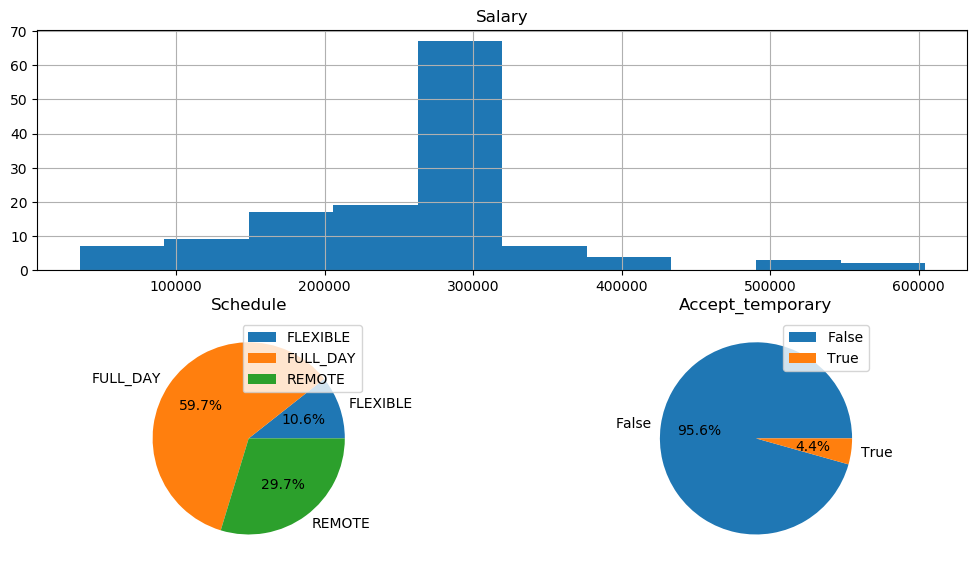

In [38]:
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

salary_series = pd.to_numeric(df["salary"], errors = "coerce")

print("Средняя зарплата: ",math.floor((salary_series.mean(skipna=True))))
print("Медианная зарплата: ",math.floor(salary_series.median(skipna=True)))
print("Среднеквадратичное отклонение зарплаты: ",math.floor(salary_series.std(skipna=True)))
vacancies_count = len(salary_series)
print("Вакансий: ",vacancies_count)
open_salary_vacancies = salary_series.count()
screwed_salary_vacancies = len(salary_series)-open_salary_vacancies
print("Вакансий с открытой зарплатой: ",
      open_salary_vacancies, "ед.,", 
      math.floor(100*open_salary_vacancies/vacancies_count), "%")
print("Вакансий без нижней или верхней границы зарплаты: ",
      screwed_salary_vacancies, "ед.,",  
      math.floor(100*screwed_salary_vacancies/vacancies_count), "%")

print("Вакансия с максимальной зарплатой")
pd.set_option("display.max_rows",None)
display(df[salary_series.idxmax():salary_series.idxmax()+1])
print("Вакансия с минимальной зарплатой")
pd.set_option("display.max_rows",None)
display(df[salary_series.idxmin():salary_series.idxmin()+1])


fz = plt.figure(figsize=(12, 7), dpi=100)
fz.add_subplot(2,1,1)
plt.title('Salary')
salary_series.hist()
fz.add_subplot(2,2,3)
make_simple_word_pie(df,"schedule",'Schedule')
fz.add_subplot(2,2,4)
make_simple_word_pie(df,"accept_temporary",'Accept_temporary')

In [39]:
from collections import Counter
import scipy
import re

# source: https://github.com/hukenovs/hh_research/
def top_keys(df):
    # Collect keys from dataframe
    keys_df = df['key_skills'].tolist()
    # Create a list of keys for all vacancies
    lst_keys = []
    for keys_elem in keys_df:
        if type(keys_elem) == str:
            for el in keys_elem[0:].split(', '):
                if el != '':
                    lst_keys.append(re.sub('\'', '', el.lower()))

    # Unique keys and their counter
    set_keys = set(lst_keys)
    # Dict: {Key: Count}
    dct_keys = {el:lst_keys.count(el) for el in set_keys}
    # Sorted dict
    srt_keys = dict(sorted(dct_keys.items(), key=lambda x: x[1], reverse=True))
    # Return pandas series
    return pd.Series(srt_keys, name='key_skills')


In [40]:
def cut_frequencys (data_series, stat = "median"):
    #частоты частот
    freq = dict(Counter(list(data_series.values)))
    freq_values = list(freq.values())
    freq_values.sort(reverse=True)

    if stat == "mean":
        freq_border = scipy.mean(freq_values)
    else:
        freq_border = scipy.median(freq_values)

    new_series = data_series.copy()    
    for index, value in data_series.items():   
        if freq[value]>freq_border:
            new_series=new_series.drop(labels=index)
   
    return new_series

### Key skills from tags

In [41]:
def make_word_barh(word_series):
    #plt.xticks(rotation='vertical')
    current_series = word_series[:25].sort_values(ascending=True)
    plt.barh(current_series.index, current_series.values)    

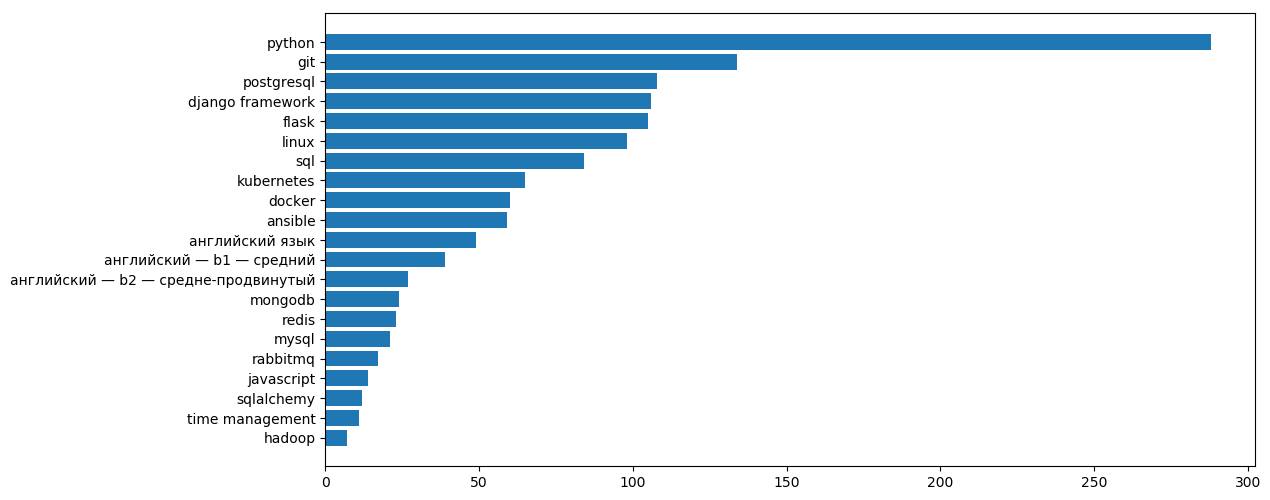

In [42]:
from matplotlib import pyplot as plt
fz = plt.figure(figsize=(12, 6), dpi=100)
fz.add_subplot(1,1,1)
make_word_barh(cut_frequencys (top_keys(df)))

### Key skills from description

In [43]:
additional_tegs = []
for dsc in df.description:
    searched = re.findall(r"(([A-z]+[\s/-]*)+)+", dsc)
    for pair in searched: 
        addteg = list(pair)[0]
        #addteg = re.sub(r'\s+|\W+','', addteg)
        addteg = re.sub(r'[\s|\W]+','', addteg)
        addteg = addteg.lower()
        if re.search(r'\w+', addteg):
            additional_tegs.append(addteg)    
            
description_freq = pd.Series(Counter(additional_tegs)).sort_values(ascending=False)

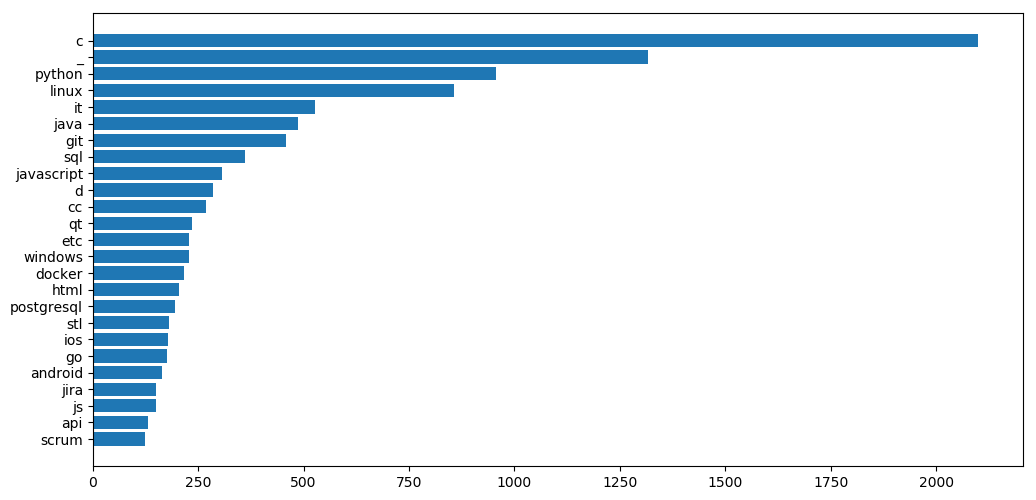

In [28]:
fz = plt.figure(figsize=(12, 6), dpi=100)
fz.add_subplot(1,1,1)
make_word_barh(description_freq)

In [29]:
! git add main.*
! git commit -m "refactoring, fixed some graph issues" 

The file will have its original line endings in your working directory


[main 3854750] refactoring, fixed some graph issues
 1 file changed, 38803 insertions(+), 6396 deletions(-)
 rewrite main.ipynb (65%)
